In [1]:
pip install pandas openpyxl matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data
df = pd.read_csv('cleaneddata.csv')

In [4]:
print(df.head())
print(df.info())
print(df.isnull().sum())

    Id            Name  Weight(kg)  Height(cm)   Age Citizenship  \
0   28  Erling Haaland        87.0       193.0  23.0      Norway   
1   24     Cole Palmer        73.0       183.0  22.0     England   
2  464  Alexander Isak        77.0       193.0  24.0      Sweden   
3  423   Ollie Watkins        69.0       180.0  28.0     England   
4   20      Phil Foden        69.0       170.0  23.0     England   

               Team  Jersey    Position  Total Play Time(min)  ...  redCards  \
0   Manchester City     9.0     Forward                  2733  ...         0   
1           Chelsea    20.0  Midfielder                  2822  ...         0   
2  Newcastle United    14.0     Forward                  2399  ...         0   
3       Aston Villa    11.0     Forward                  3483  ...         0   
4   Manchester City    47.0  Midfielder                  3039  ...         0   

   goalAssists  shotsOnTarget  totalShots  totalGoals  goalsConceded  \
0            5             54         

TOP 10 GOALSCORERS (BAR CHART)

In [29]:
# Ensure Goals Data is Numeric
# Convert the 'Goals' column to numeric, setting errors to NaN for non-numeric values
df['totalGoals'] = pd.to_numeric(df['totalGoals'], errors='coerce')

# Drop rows where 'Goals' is NaN (if conversion failed)
df.dropna(subset=['totalGoals'], inplace=True)

# Sort the DataFrame by Goals in Descending Order
df_sorted = df.sort_values(by='totalGoals', ascending=False)

# Select the Top 10 Goal Scorers
df_top_10 = df_sorted.head(10)

# Display the first few rows to verify
print(df_top_10)

    Id             Name  Weight(kg)  Height(cm)   Age  Citizenship  \
0   28   Erling Haaland        87.0       193.0  23.0       Norway   
1   24      Cole Palmer        73.0       183.0  22.0      England   
2  464   Alexander Isak        77.0       193.0  24.0       Sweden   
3  423    Ollie Watkins        69.0       180.0  28.0      England   
4   20       Phil Foden        69.0       170.0  23.0      England   
5  193  Dominic Solanke        79.0       188.0  26.0      England   
6  566    Mohamed Salah        71.0       175.0  31.0        Egypt   
7  499    Son Heung-Min        78.0       183.0  31.0  South Korea   
8  127      Bukayo Saka        72.0       178.0  22.0      England   
9  164     Jarrod Bowen        69.0       175.0  27.0      England   

                Team  Jersey    Position  Total Play Time(min)  ...  \
0    Manchester City     9.0     Forward                  2733  ...   
1            Chelsea    20.0  Midfielder                  2822  ...   
2   Newcastle Un

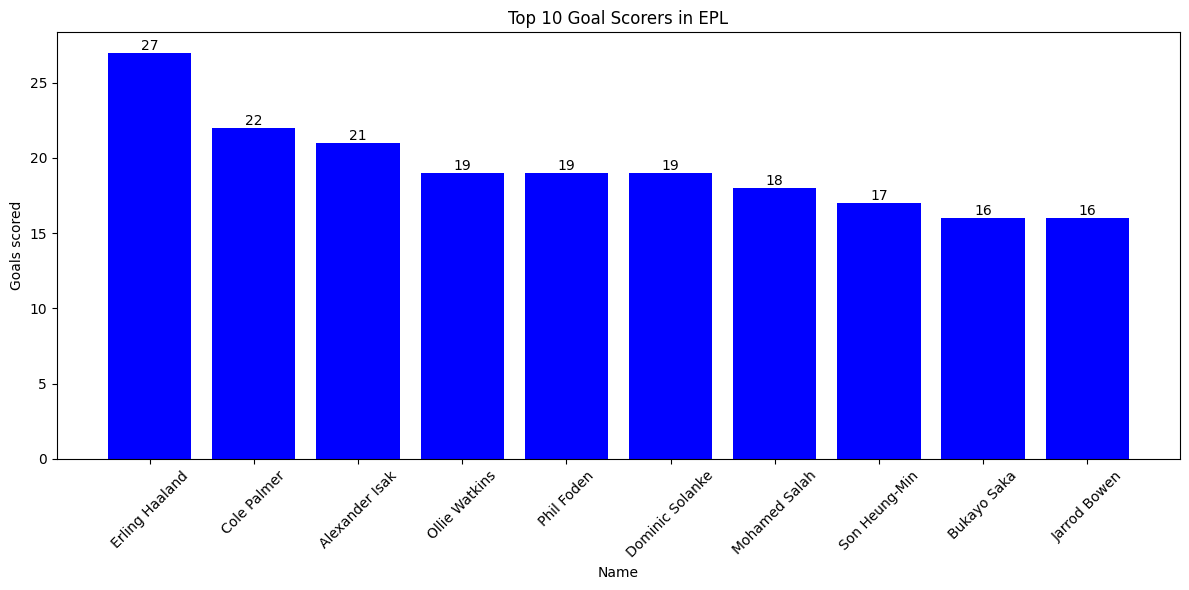

In [30]:
# Visualize the Top 10 Goal Scorers
plt.figure(figsize=(12, 6))

# Bar Plot of Top 10 Players vs. Goals
plt.bar(df_top_10['Name'], df_top_10['totalGoals'], color='blue')

for i in range(len(df_top_10)):
    plt.text(df_top_10['Name'].iloc[i], df_top_10['totalGoals'].iloc[i],
             f'{df_top_10["totalGoals"].iloc[i]}', ha='center', va='bottom', fontsize=10)
    
df['totalGoals'] = df['totalGoals'].astype(int)

# Set x-axis limits and ticks
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.xlabel('Name')
plt.ylabel('Goals scored')
plt.title('Top 10 Goal Scorers in EPL')

plt.tight_layout()  # Adjust layout to ensure labels fit well
plt.show()

TOP 10 ASSIST PROVIDERS (HORIZONTAL BAR CHART)

In [31]:
# Ensure Assists Data is Numeric
# Convert the 'Assists' column to numeric, setting errors to NaN for non-numeric values
df['goalAssists'] = pd.to_numeric(df['goalAssists'], errors='coerce')

# Drop rows where 'Assists' is NaN (if conversion failed)
df.dropna(subset=['goalAssists'], inplace=True)

# Sort the DataFrame by Assists in Descending Order
df_sorted = df.sort_values(by='goalAssists', ascending=False)

# Select the Top 10 Players by Assists
df_top_10_assists = df_sorted.head(10)

# Display the first few rows to verify
print(df_top_10_assists)

      Id                Name  Weight(kg)  Height(cm)   Age Citizenship  \
3    423       Ollie Watkins        69.0       180.0  28.0     England   
1     24         Cole Palmer        73.0       183.0  22.0     England   
86   245         Pascal Groß        78.0       180.0  32.0     Germany   
35   121     Martin Ødegaard        68.0       178.0  25.0      Norway   
144  635          Pedro Neto        62.0       173.0  24.0    Portugal   
71    98     Brennan Johnson        73.0       185.0  22.0       Wales   
70    87  Morgan Gibbs-White         NaN       170.0  24.0     England   
87    14     Kevin De Bruyne        68.0       180.0  32.0     Belgium   
6    566       Mohamed Salah        71.0       175.0  31.0       Egypt   
18   465      Anthony Gordon        72.0       183.0  23.0     England   

                        Team  Jersey    Position  Total Play Time(min)  ...  \
3                Aston Villa    11.0     Forward                  3483  ...   
1                    Chelse

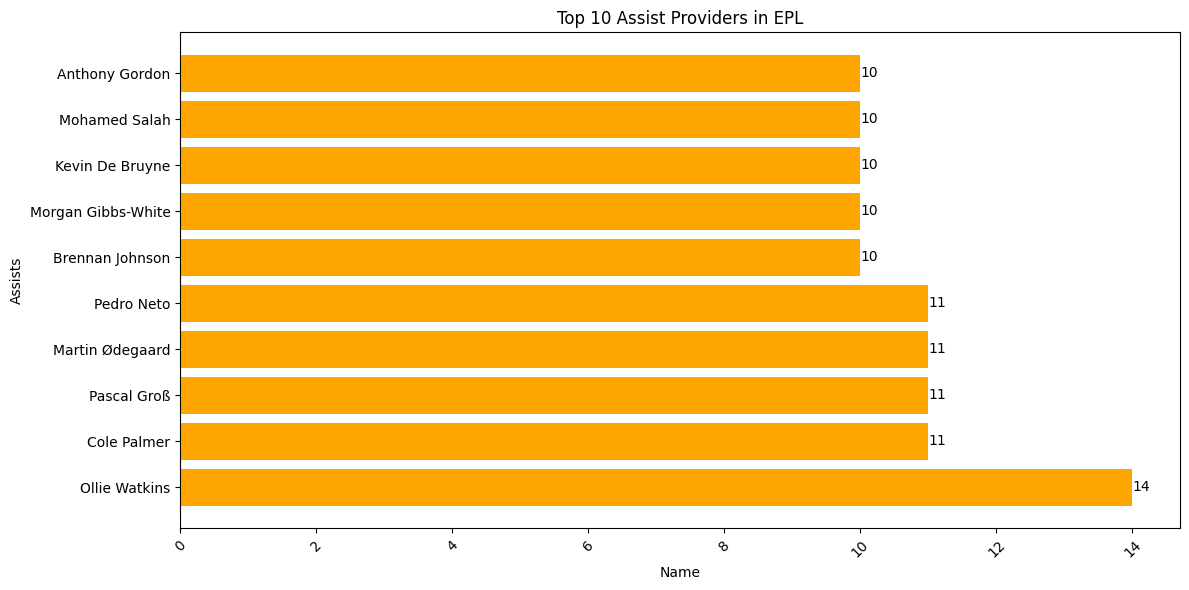

In [32]:
# Visualize the Top 10 Players by Assists
plt.figure(figsize=(12, 6))

# Plotting the horizontal bar chart
plt.barh(df_top_10_assists['Name'], df_top_10_assists['goalAssists'], color='orange')

# Annotate each bar with its value
for index, value in enumerate(df_top_10_assists['goalAssists']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)


# Set x-axis limits and ticks
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.xlabel('Name')
plt.ylabel('Assists')
plt.title('Top 10 Assist Providers in EPL')

plt.tight_layout()  # Adjust layout to ensure labels fit well
plt.show()

TEAM COMPARISON PERFOMANCE (DOUBLE BAR GRAPH)

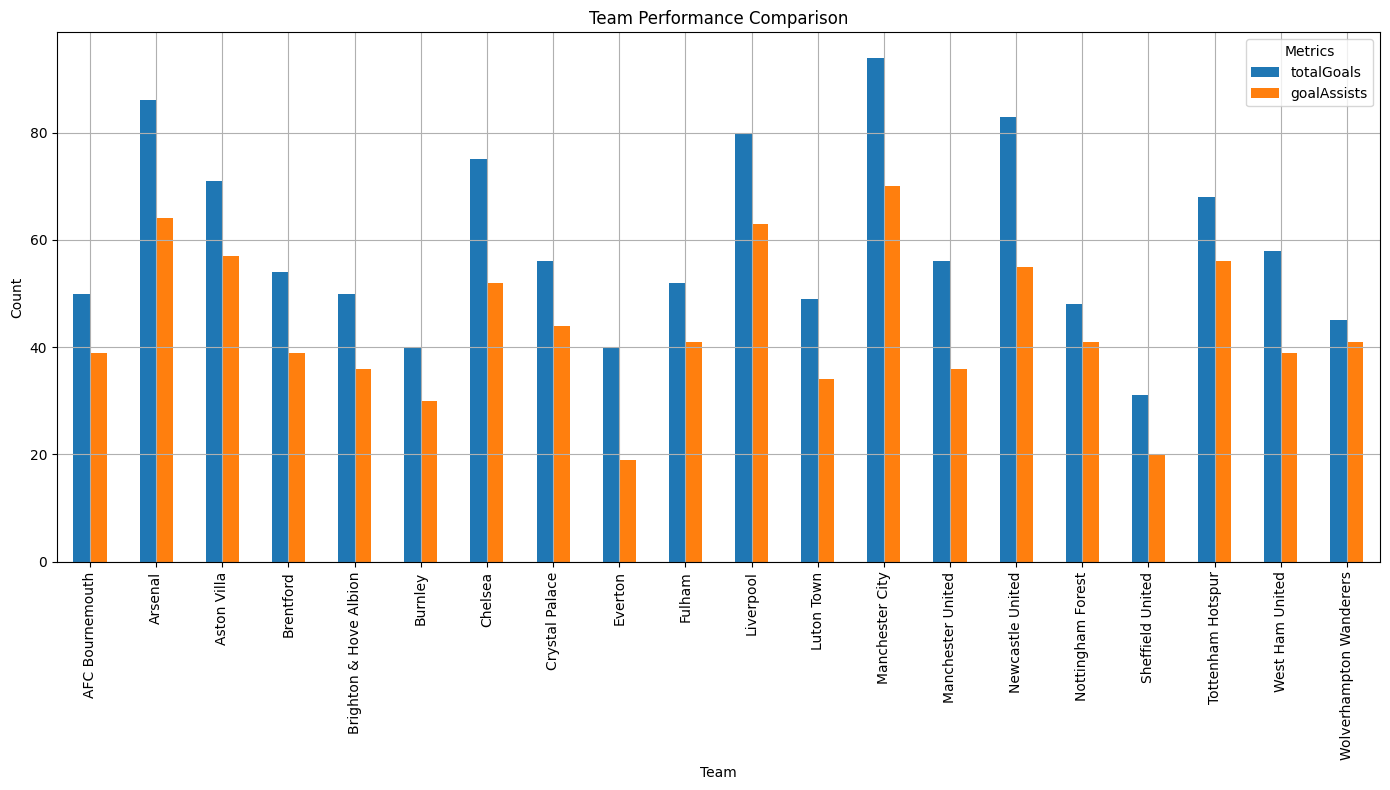

In [33]:
# Aggregate performance metrics by team
metrics = df.groupby('Team').agg({'totalGoals': 'sum', 'goalAssists': 'sum',}).reset_index()

# Plot
metrics.plot(x='Team', kind='bar', stacked=False, figsize=(14, 8))
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Team Performance Comparison')
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Ensure 'shotsOnTarget' column exists and is numeric
if 'shotsOnTarget' in df.columns:
    df['shotsOnTarget'] = pd.to_numeric(df['shotsOnTarget'], errors='coerce')
else:
    raise ValueError("Column 'shotsOnTarget' not found in the data.")

# Sort the DataFrame by 'shotsOnTarget' in descending order
top_players = df.sort_values(by='shotsOnTarget', ascending=False).head(10)

TOP 10 PLAYER SHOTS ON TARGET (PIE CHART)

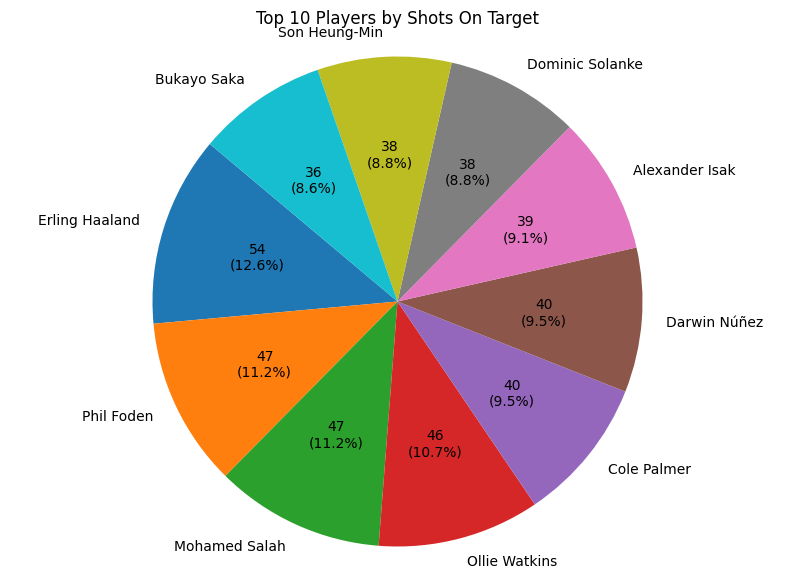

In [35]:
# Prepare data for pie chart
labels = top_players['Name']  # Replace with the actual column name for player names
sizes = top_players['shotsOnTarget']

def func(pct, allvalues):
    total = sum(allvalues)
    value = int(pct / 100. * total)
    return f'{value}\n({pct:.1f}%)'

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
plt.title('Top 10 Players by Shots On Target')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

TOTAL YELLOW CARDS BY TEAM (LINE PLOT)

In [36]:
# Ensure 'yellowCards' and 'Team' columns exist and are numeric
if 'yellowCards' in df.columns and 'Team' in df.columns:
    df['yellowCards'] = pd.to_numeric(df['yellowCards'], errors='coerce')
else:
    raise ValueError("Required columns not found in the data.")

# Aggregate total yellow cards by team
team_yellow_cards = df.groupby('Team')['yellowCards'].sum().reset_index()

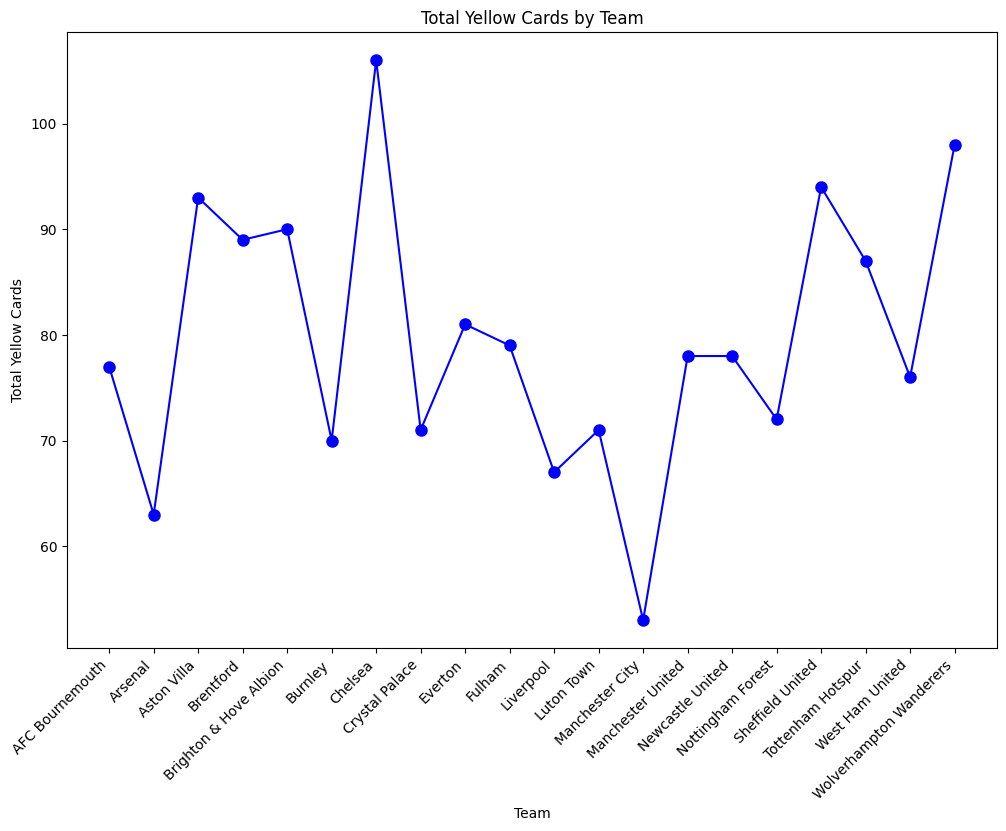

In [37]:
# Plot the line plot
plt.figure(figsize=(12, 8))
plt.plot(team_yellow_cards['Team'], team_yellow_cards['yellowCards'], marker='o', linestyle='-', color='b', markersize=8)

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Total Yellow Cards')
plt.title('Total Yellow Cards by Team')
plt.xticks(rotation=45, ha='right')  # Rotate team names for better readability

# Display the scatter plot
plt.show()

In [38]:
# Ensure 'Total Play Time (min)' and 'player' columns exist and are numeric
if 'Total Play Time(min)' in df.columns and 'Name' in df.columns:
    df['Total Play Time(min)'] = pd.to_numeric(df['Total Play Time(min)'], errors='coerce')
else:
    raise ValueError("Required columns not found in the data.")

# Sort the DataFrame by 'Total Play Time (min)' in descending order
top_players = df.sort_values(by='Total Play Time(min)', ascending=False).head(10)

TOP 10 PLAYER WITH THE MOST MINUTES PLAYED (HORIZONTAL BAR PLOT)

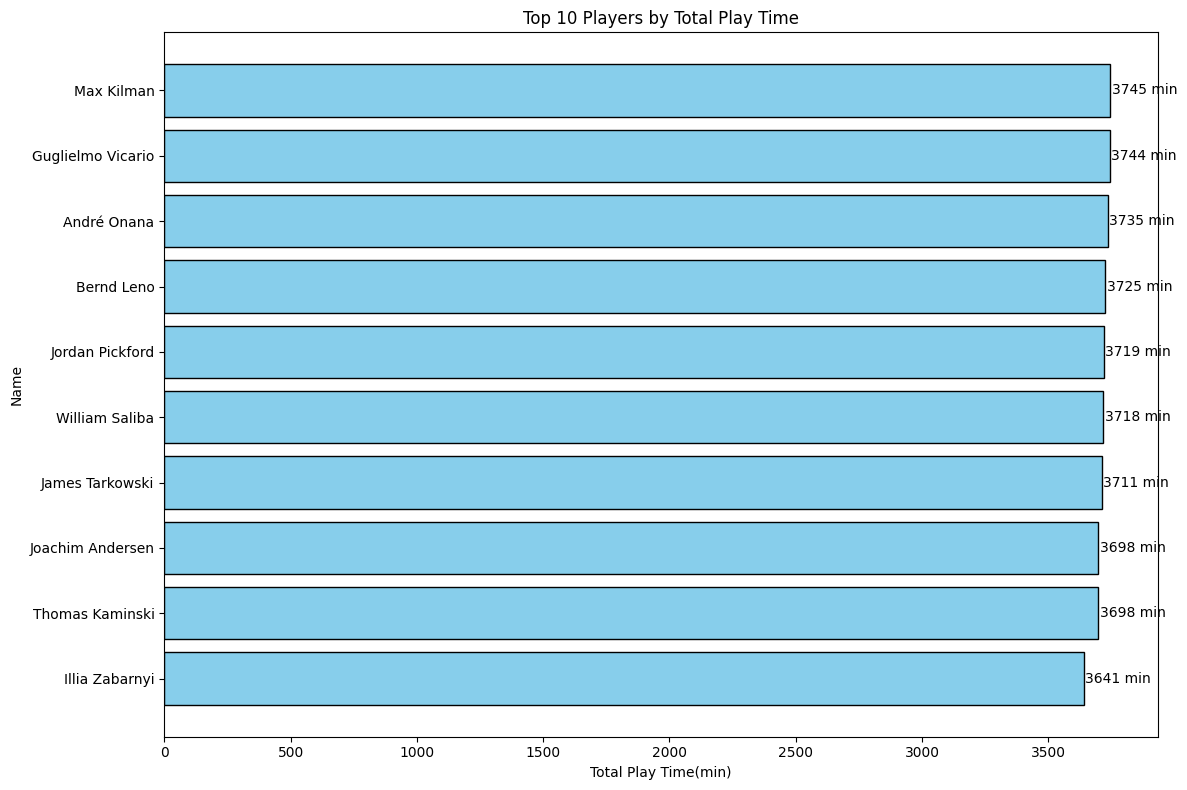

In [54]:
# Prepare data for horizontal bar plot
player_names = top_players['Name']  # Replace with the actual column name for player names
play_times = top_players['Total Play Time(min)']

# Plot the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(player_names, play_times, color='skyblue', edgecolor='black')

# Add labels on each bar
for bar in bars:
    # Positioning the label slightly to the right of the end of the bar
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()} min', 
             va='center', ha='left', color='black')

# Add labels and title
plt.xlabel('Total Play Time(min)')
plt.ylabel('Name')
plt.title('Top 10 Players by Total Play Time')

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis to have the player with the most play time at the top
plt.tight_layout()
plt.show()


In [55]:
# Calculate the total goals scored by each team
df['totalTeamGoals'] = df.groupby('Team')['totalGoals'].transform('sum')

# Calculate the percentage of the team's goals
df['percentage_team_goals'] = (df['totalGoals'] / df['totalTeamGoals']) * 100

# Sort by percentage of team's goals in descending order
df_sorted = df.sort_values(by='percentage_team_goals', ascending=False)

# Select the top 10 players
top_10_players = df_sorted.head(10)



TOP 10 PLAYERS WITH THE HIGHEST PERCENTAGE OF TEAM'S GOALS (BAR CHART)

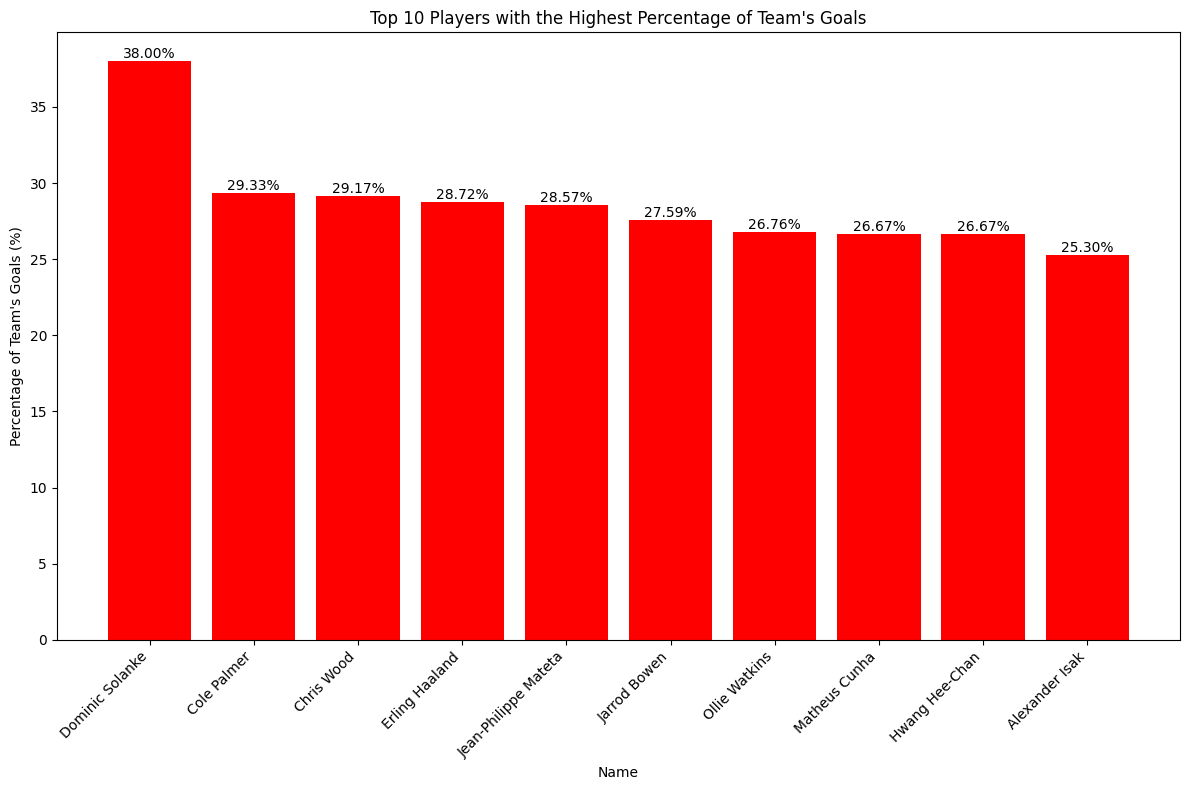

In [56]:
# Create a bar plot for the top 10 players
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_players['Name'], top_10_players['percentage_team_goals'], color='red')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Percentage of Team\'s Goals (%)')
plt.title('Top 10 Players with the Highest Percentage of Team\'s Goals')
plt.xticks(rotation=45, ha='right')

# Add percentage labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', 
             ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()